<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220509_NLP_exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4 Embedding

###1. Keras Embedding Layer

: 무작위로 특정 차원으로 입력 벡터를 뿌린 후 학습을 통해 가중치를 조정하는 방식. 즉, 단어 사이의 관계를 반영하는 방법 X

    model = Sequential()
    model.add(Embedding(vocab_size, 128, input_length = max_len))

###2. word2vec
: 주변 단어와의 관계를 통해 해당 단어의 의미적 특성 파악



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/ESAA/GoogleNews-vectors-negative300.bin.gz', binary = True)

3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장합니다.

In [ ]:
vocab_size = 30
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in word2vec: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = word2vec[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_matrix[i] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.
    else:
        print("word2vec에 없는 단어입니다.")
        break

NameError: ignored

4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용합니다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len))

###3. glove

: word2vec의 단점을 보완. (데이터 전체에 대한 정보를 담기 어렵다는 단점.)
-> 데이터 전체에 대한 빈도를 반영

In [ ]:
2. # load the whole embedding into memory
glove = dict()
f = open('./glove.txt')
for line in f:
    values = line.split()
    word = values[0]
    vector = asarray(values[1:], dtype='float32')
    glove[word] = vector
f.close()

3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장합니다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in glove: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = glove[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_mxtrix[i] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.
    else:
        print("glove 없는 단어입니다.")
        break

4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용합니다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len))

##4. Fasttext
: sub 단어를 단위로 사용해서 미리 학습되지 않은 단어에 대해서도 표현 가능

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
FastText = KeyedVectors.load_word2vec_format('./fasttext.bin', binary = True)

3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장합니다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in word2vec: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = word2vec[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_matrix[i] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.

4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용합니다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len))

#5 Modeling
* 현재 ML에서 주로 사용되는 SVM, RF, Boosting Machine등을 활용하여 간단한 NLP 태스크를 해결이 가능하지만 복잡한 문제를 해결하기에는 한계
* 기본적으로 네트워크 모델을 이용하여 NLP 문제를 해결하는 것이 일반적

###1. RNN

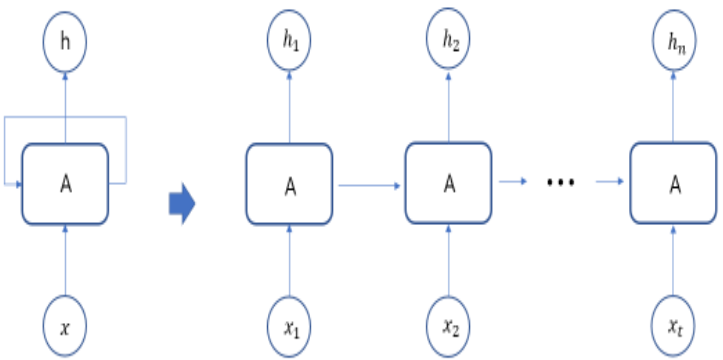

* x1에 대한 출력이 위쪽 화살표와 아래쪽 화살표 두 개인 것을 확인
* 즉, x1에 대한 정보가 h1 이라는 출력뿐만 아니라 다음 x2에 대한 정보와 같이 입력이 되는 구조
* 이 때 A에 해당하는 부분을 LSTM과 GRU 등을 사용
* 구조에서 보시다시피 RNN은 순차적인 구조이며 그 특징 때문에 연산에 많은 시간이 걸리게 되고 네트워크의 고질적인 문제인 역전파 소실 문제

### 2. LSTM
* 기존 RNN에 cell state를 추가한 것
* cell state: 입력들의 정보를 선별해 다음 출력으로 내보내는 게이트
* cell state로 불필요한 정보를 걸러내고 역전파 소실 문제를 줄여 성능 향상

https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/

### 3. GRU
* GRU는 LSTM의 복잡한 구조를 간결하게 보완한 모델. 더 빠르고 비슷한 성능을 냄.

### 4. Attention

RNN의 구조적 한계
* 입력으로 이용된 정보를 순차적으로 고정 길이로 압축하면서 발생하는 정보의 손실
* 역전파 소실

-> attention이 해결

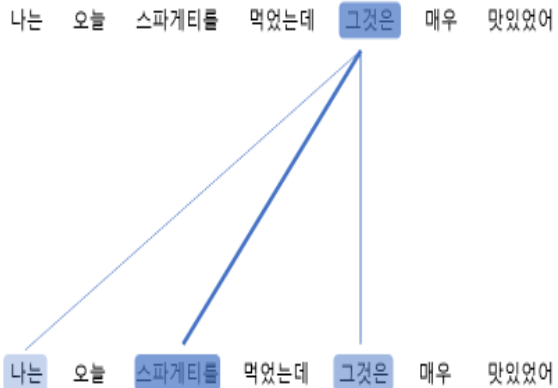

In [ ]:
def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null']
    tokenizer = Okt()
    
    for text in tqdm.tqdm(text_list):
        txt = re.sub('[^가-힣a-z]', ' ', text.lower())
        token = tokenizer.morphs(txt)
        token = [t for t in token if t not in stopwords or type(t) != float]
        
    return token, tokenizer

train['token'], okt = text_preprocessing(train['content'])

In [ ]:
def text2sequence(train_text, max_len=1000):
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_text)
    train_X_seq = tokenizer.texts_to_sequences(train_text)
    vocab_size = len(tokenizer.word_index) + 1
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len)
    return X_train, vocab_size, tokenizer

train_y = train['info']
train_X, vocab_size, vectorizer = text2sequence(train['token'], max_len = 100)
print(train_X.shape, train_y.shape)

In [ ]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)
embedding_matrix = np.zeros((vocab_size, 300))

for index, word in enumerate(vocabulary):
    if word in word2vec
        embedding_vector = word2vec[word] 
        embedding_mxtrix[i] = embedding_vector 
    else:
        print("word2vec에 없는 단어입니다.")
        break

In [ ]:
def LSTM(vocab_size, max_len=1000):
    model = Sequential()
    model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len)) #임베딩 가중치 적용 코드
    model.add(SpatialDropout1D(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    model.summary()
    return model